In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### digit recognition 

In [ ]:
# load data and split them into train and test sets
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape([x_train.shape[0],28,28,1])
x_test = x_test.reshape([x_test.shape[0],28,28,1])
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# # building the cnn model
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
# model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu))
# model.add(tf.keras.layers.Dense(units=10, activation = tf.nn.softmax))

In [ ]:
# import pandas as pd
# import numpy as np

# import matplotlib.pyplot as plt 
# import cv2 as cv

# from keras.layers import Conv2D, Input, LeakyReLU, Dense, Activation, Flatten, Dropout, MaxPool2D
# from keras import models
# from keras.optimizers import Adam,RMSprop 
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau

# import pickle

# %matplotlib inline

# model = models.Sequential()

# # Block 1
# model.add(Conv2D(32,3, padding  ="same",input_shape=(28,28,1)))
# model.add(LeakyReLU())
# model.add(Conv2D(32,3, padding  ="same"))
# model.add(LeakyReLU())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# # Block 2
# model.add(Conv2D(64,3, padding  ="same"))
# model.add(LeakyReLU())
# model.add(Conv2D(64,3, padding  ="same"))
# model.add(LeakyReLU())
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# model.add(Dense(256,activation='relu'))
# model.add(Dense(32,activation='relu'))
# model.add(Dense(10,activation="sigmoid"))

In [ ]:
from keras.utils.np_utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))

model.add(BatchNormalization(momentum = .05))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization(momentum=0.05))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization(momentum=.05))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [ ]:
initial_lr = 0.001
loss = "sparse_categorical_crossentropy"
model.compile(Adam(lr=initial_lr), loss=loss ,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

In [ ]:
# training model
print('start training...')
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(x_train,y_train,epochs = 5)
loss, accuracy = model.evaluate(x_test, y_test)

print(accuracy)
print(loss)

start training...
Epoch 1/5
1875/1875 [==============================] - 483s 258ms/step - loss: 0.0739 - accuracy: 0.9788
Epoch 2/5
1875/1875 [==============================] - 484s 258ms/step - loss: 0.0600 - accuracy: 0.9819
Epoch 3/5
1875/1875 [==============================] - 487s 260ms/step - loss: 0.0509 - accuracy: 0.9856
Epoch 4/5
1875/1875 [==============================] - 482s 257ms/step - loss: 0.0439 - accuracy: 0.9874
Epoch 5/5
313/313 [==============================] - 18s 57ms/step - loss: 0.0231 - accuracy: 0.9932
0.9932000041007996
0.023060934618115425


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 18s 58ms/step - loss: 0.0231 - accuracy: 0.9932


[0.023060934618115425, 0.9932000041007996]

In [ ]:
model.save('/content/digit.h5')

In [ ]:
model_path = '/content/drive/MyDrive/Project of Image Analysis/model/digit.h5'
model = models.load_model(model_path)

In [ ]:
img_path = '/content/drive/MyDrive/Project of Image Analysis/digit/8.PNG'
img=cv2.imread(img_path)[:,:,0]
# print(img.shape)
# resize the picture
crop_size = (28, 28)
img = cv2.resize(img, crop_size, interpolation = cv2.INTER_CUBIC)
img = np.invert(np.array([img]))

print(img.shape)
prediction = model.predict(img)
print(f'prediction result: {np.argmax(prediction)}')
plt.imshow(img[0],cmap = plt.cm.binary)
# plt.imshow(img[0])
plt.show()

TypeError: ignored

### multi-digit cognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def preProccessing(img):
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1)
    imgCanny = cv2.Canny(imgBlur, 200, 200)
    imgDial = cv2.dilate(imgCanny, kernal, iterations=2)        # 膨胀操作
    imgThres = cv2.erode(imgDial, kernal, iterations=1)         # 腐蚀操作
    return imgThres

In [ ]:
preProccessing(img[0])

error: ignored

In [ ]:
cv2.namedWindow('TrackBar')
cv2.resizeWindow('TrackBar',640,240)
cv2.createTrackbar('min','TrackBar',0,179,empty)


## Practice 

### basic functions

In [ ]:
# connect to google driver
from google.colab import drive
drive.mount('/content/drive')

In [5]:
image_path = '/content/drive/MyDrive/Project of Image Analysis/image/carpenter.jpg'
img = cv2.imread(image_path)

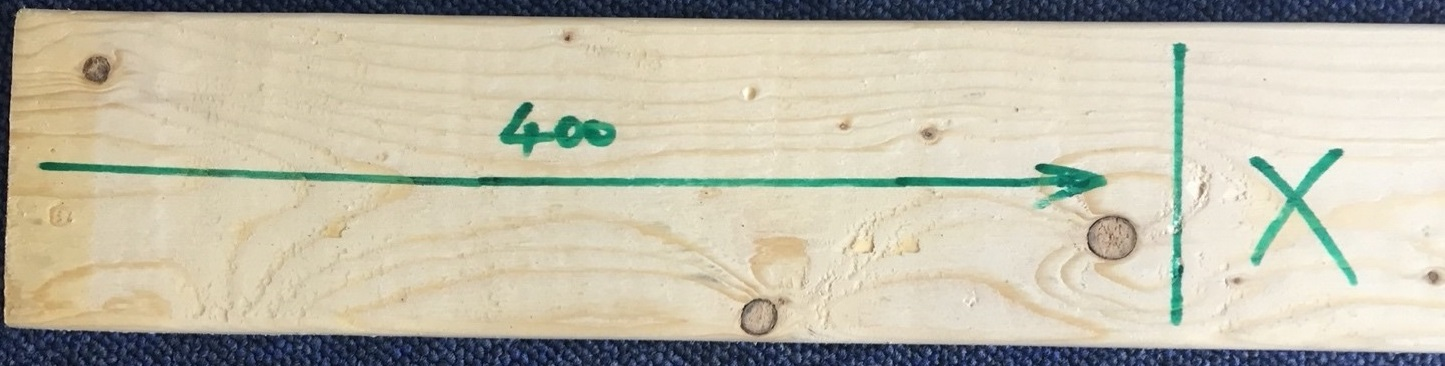

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

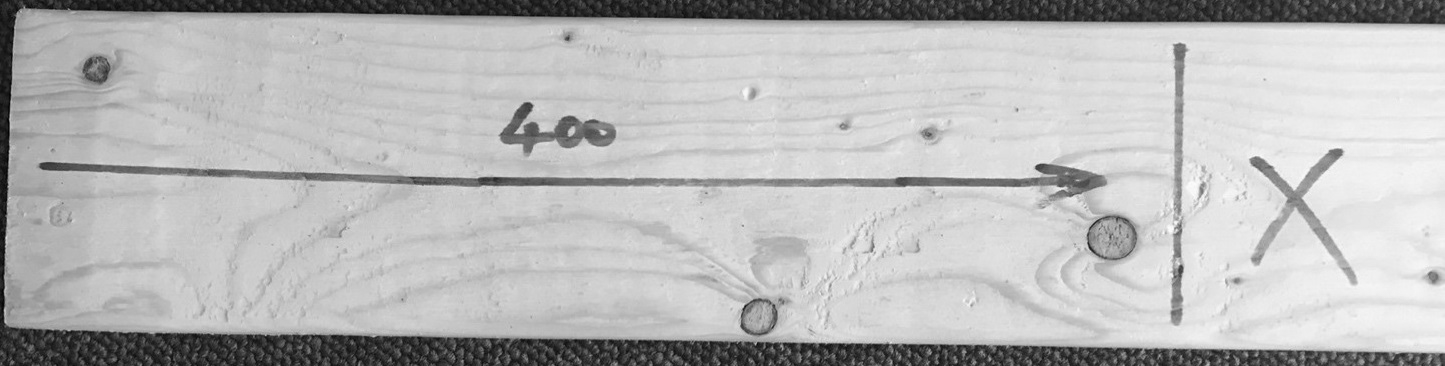

In [ ]:
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(imgGray)

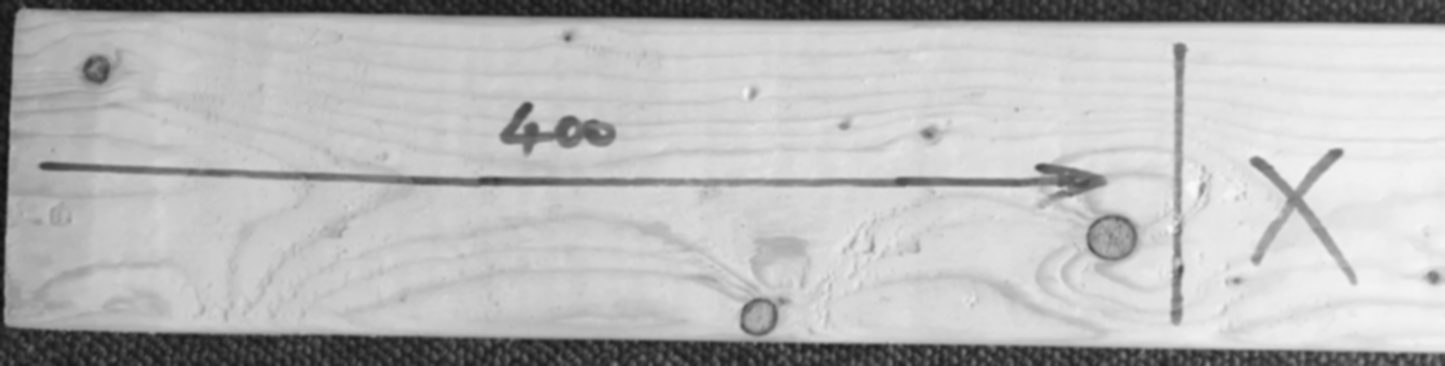

In [ ]:
imgBlur = cv2.GaussianBlur(imgGray,(7,7),0)
cv2_imshow(imgBlur)

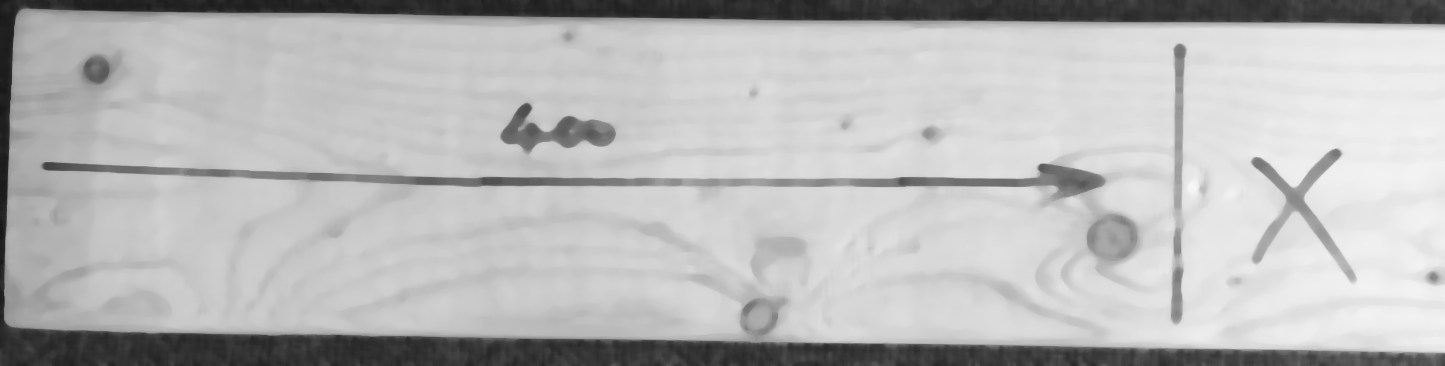

In [ ]:
imgMedianBlur = cv2.medianBlur(imgGray,11)
cv2_imshow(imgMedianBlur)

### Resizing and cropping

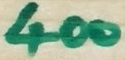

In [ ]:
imgCropped = img[100:160,495:620]
cv2_imshow(imgCropped)

In [ ]:
imgBule = img.copy() 
imgBule[:] = 225, 10, 100
cv2_imshow(imgBule)

NameError: ignored

### shapes and texts

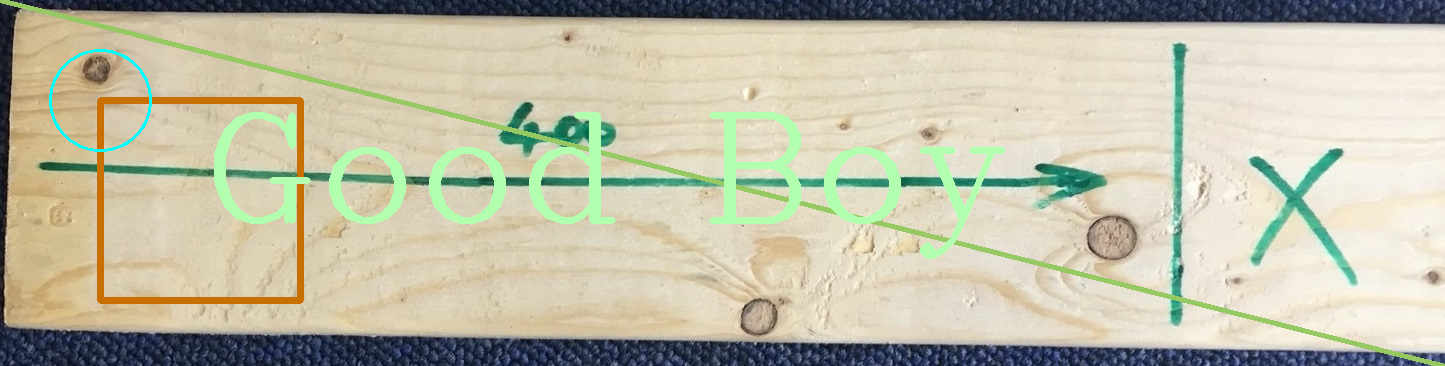

In [18]:
from google.colab.patches import cv2_imshow
img_temp = cv2.imread(image_path)
cv2.line(img_temp,(0,0),(img_temp.shape[1],img_temp.shape[0]),(100,200,150),3)
cv2.rectangle(img_temp,(100,100),(300,300),(0,111,200),5)
cv2.circle(img_temp,(100,100),50,(255,255,0),2)
cv2.putText(img_temp,'Good Boy',(202,220),cv2.FONT_HERSHEY_COMPLEX,5,(175,255,178),5)
cv2_imshow(img_temp)

### Color detection

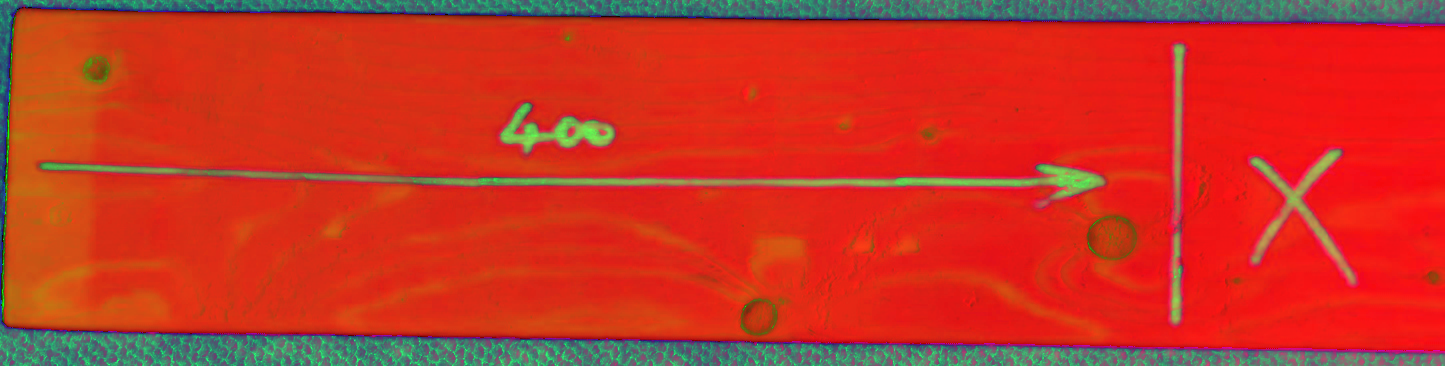

In [ ]:
img_temp = cv2.imread(image_path)
imgHSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2_imshow(imgHSV)

### coutour/shape detection


## Image classification

### preprocess image and get lables

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
image_x_path = '/content/drive/MyDrive/Project of Image Analysis/X'

In [ ]:
def preprocessing(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) #HSV
    # define range of blue color in HSV
    lower_green = np.array([55,50,0])
    upper_green = np.array([90,255,255])
    
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_green, upper_green)

    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(img,img, mask= mask)
    
    #tresholding
    kernel = np.ones((5,5),np.uint8)
    gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

    ret,thresh1 = cv2.threshold(gray,40,255,cv2.THRESH_BINARY)
    dilation = cv2.dilate(thresh1,kernel,iterations = 1)
    
    return dilation 

In [ ]:
classes = ['arrow_line','cutline','X_symbol','digits']

In [ ]:
# now there is no datasets
X_train = img_datasets[:80]
X_test = img_datasets[80:]
y_train = img_lable[:80]
y_test = img_lable[80:]

### build cnn model

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

In [ ]:
# building cnn model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

##Pretrained VGG16 model

In [1]:
from keras.applications.vgg16 import VGG16

553467904/553467096 [==============================] - 7s 0us/step


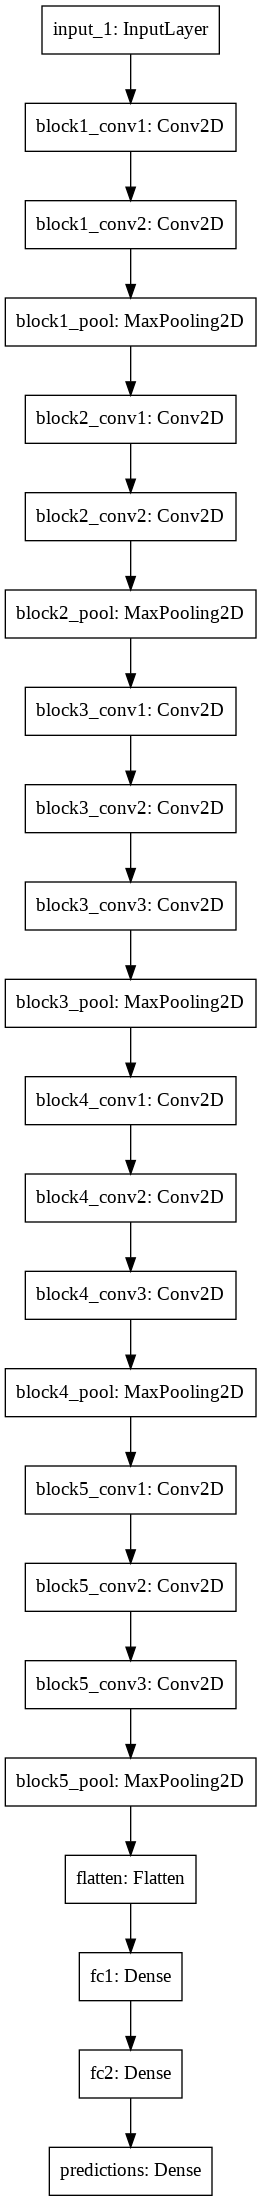

In [2]:
from keras.utils import  plot_model
model = VGG16()
plot_model(model)